In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from qsa_pwfa.simulation import Simulation
from qsa_pwfa.inline_methods import get_density

In [2]:
"""
CASE 1

nb/n0 = 5
kp*sigma_r = 0.1
kp_sigma_z = 1
Lambda = 0.05
"""

# Beam 
n_b = 5
R_b = 0.1
ksi0 = 5
R_xi = 1

# plasma
L_xi = 18
L_r = 2

# grid
N_xi = 2048

d_xi = L_xi/N_xi
dr = 0.25*d_xi

N_r = int(np.ceil(L_r/dr / 4)*4)
L_r = N_r * dr

sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r)
sim.init_beam(n_b, R_b, ksi0, R_xi)

In [3]:
r_xi = np.zeros((sim.N_xi, sim.N_r))
vz_xi = np.zeros((sim.N_xi, sim.N_r))

r_xi[0] = sim.r
vz_xi[0] = sim.v_z
    
for i_xi in range(N_xi-1):
    sim.advance_xi(i_xi)
    r_xi[i_xi+1] = sim.r
    vz_xi[i_xi+1] = sim.v_z

<IPython.core.display.Javascript object>


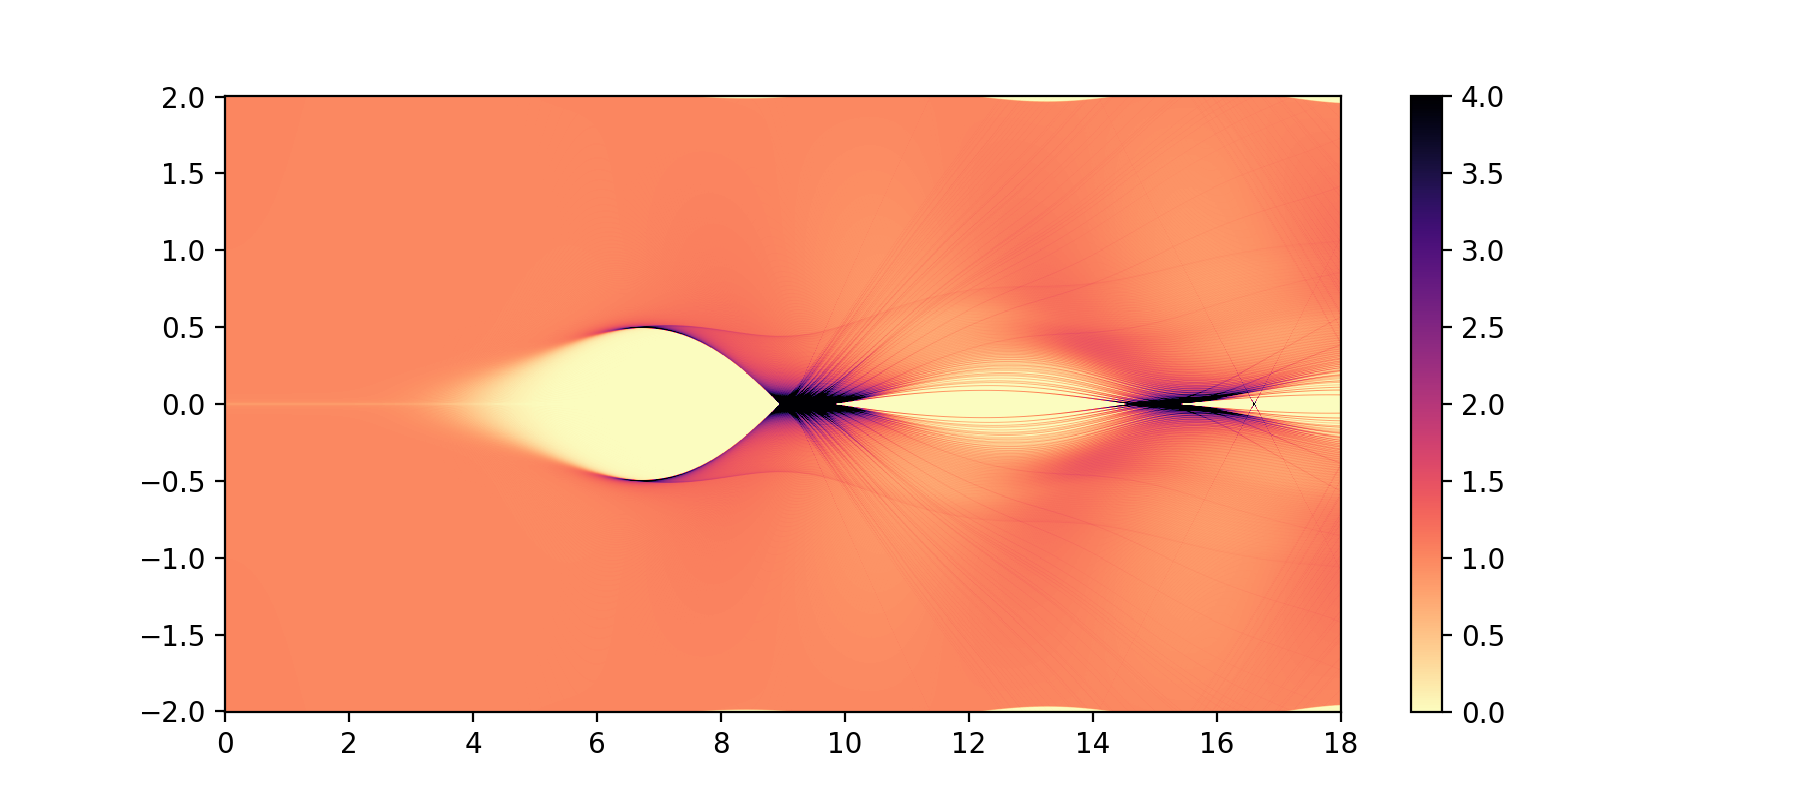

In [4]:
Nr_new = sim.N_r//3
dr_proj = L_r/Nr_new

dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
dens_ext = np.hstack((dens[:,1:][:,::-1], dens[:,1:]))


plt.figure(figsize=(9,4))

plt.imshow(dens_ext.T, origin='lower', 
           aspect='auto', cmap=plt.cm.magma_r,
           vmax=4, 
           extent=[0, sim.L_xi, -sim.L_r, sim.L_r ])
plt.colorbar()

In [5]:
"""
CASE 2

nb/n0 = 40
kp*sigma_r = 0.25
kp_sigma_z = 1
Lambda = 2.5
"""

# Beam 
n_b = 40 
R_b = 0.25

ksi0 = 5
R_xi = 1

# plasma
L_xi = 18
L_r = 24

# grid
N_xi = 512*3

d_xi = L_xi/N_xi
dr = 0.95*d_xi

N_r = int(np.ceil(L_r/dr / 4)*4)
L_r = N_r * dr

sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r)
sim.init_beam(n_b, R_b, ksi0, R_xi)

In [6]:
r_xi = np.zeros((sim.N_xi, sim.N_r))
vz_xi = np.zeros((sim.N_xi, sim.N_r))

r_xi[0] = sim.r
vz_xi[0] = sim.v_z
    
for i_xi in range(N_xi-1):
    sim.advance_xi(i_xi)
    r_xi[i_xi+1] = sim.r
    vz_xi[i_xi+1] = sim.v_z

<IPython.core.display.Javascript object>


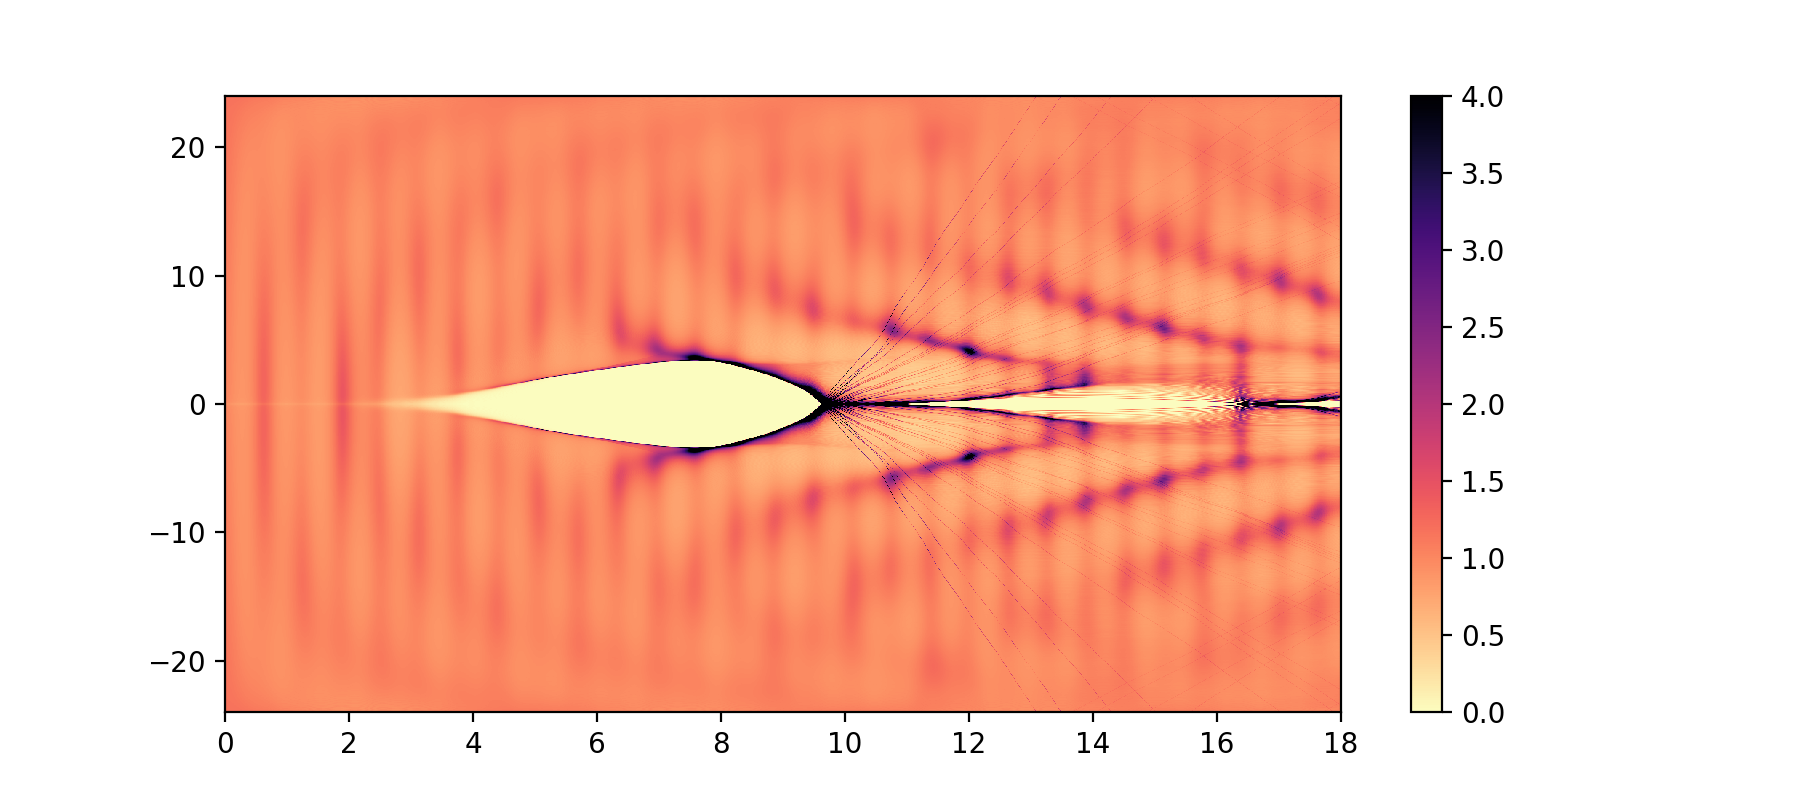

In [7]:
Nr_new = sim.N_r//3
dr_proj = L_r/Nr_new

dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
dens_ext = np.hstack((dens[:,1:][:,::-1], dens[:,1:]))


plt.figure(figsize=(9,4))

plt.imshow(dens_ext.T, origin='lower', 
           aspect='auto', cmap=plt.cm.magma_r,
           vmax=4, 
           extent=[0, sim.L_xi, -sim.L_r, sim.L_r ])
plt.colorbar()